# Observations and Insights

1. Of the four most promising drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane did the best at reducing the size of the tumor by the end of the treatment. They have the lowest tumor volumes on average across the board (40.68 mm^3 and 40.22	mm^3 respectively). They also have the lowest variances (24.95 and 23.49 repectively) of the drug regimens studied, indicating that these drug regimens work more consistently than the others.

# Cleaning the Data

In [5]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# read data results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

#combining the data into one data frame
complete_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
complete_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#finding number of mice in the dataframe
print(len(complete_mouse_data["Mouse ID"].unique()))

249


In [121]:
#pulling out all dupicate mice by ID number and getting their indicies (Chen, 2021)
bad_mice_location = complete_mouse_data.loc[(complete_mouse_data.duplicated() == True), :].index
#finding the "Mouse ID"s for the duplicate mice
bad_mice = complete_mouse_data.iloc[bad_mice_location]["Mouse ID"]

#dropping the data related to the bad mice by only keeping the non-duplicated mice's data (2020 Drop or delete the row)
cleaned_mouse_data = complete_mouse_data.loc[complete_mouse_data["Mouse ID"].values != bad_mice.values, :]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
#finding number of mice in the cleaned dataframe
print(len(cleaned_mouse_data["Mouse ID"].unique()))

248


# Summary Statistics

In [206]:
#obtain list of drug regiments then alphabetize
drug_regimens = sorted(cleaned_mouse_data["Drug Regimen"].unique())

#group data by drug regimen to run statistics calculations on
drug_grouped_cleaned_mouse_data = cleaned_mouse_data.groupby("Drug Regimen")

#find mean, median, variance, standard deviation, and SEM of tumor volume
tumor_mean = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].var()
tumor_std_dev = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].sem()

#put data into summary data frame
drug_regimen_summary_stats = pd.DataFrame({
    "Drug Regimen": drug_regimens,
    "Tumor Volume (mm3) Mean": round(tumor_mean, 2),
    "Tumor Volume (mm3) Median": round(tumor_median, 2), 
    "Tumor Volume (mm3) Variance": round(tumor_variance, 2), 
    "Tumor Volume (mm3) Standard Deviation": round(tumor_std_dev, 2), 
    "Tumor Volume (mm3) SEM": round(tumor_sem, 2)
})

#set index to the drug regimen names
drug_regimen_summary_stats = drug_regimen_summary_stats.set_index("Drug Regimen")
drug_regimen_summary_stats

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

In [18]:
#for the bar charts- measurements for each regiment
drug_measurement_counts = drug_grouped_cleaned_mouse_data["Tumor Volume (mm3)"].count()

#for the pie charts - number of male and female mice (Pandas Development Team, 2021 .nunique())
gendered_mice = cleaned_mouse_data.groupby("Sex")
gendered_mice_counts = gendered_mice["Mouse ID"].nunique()

Using Pandas:

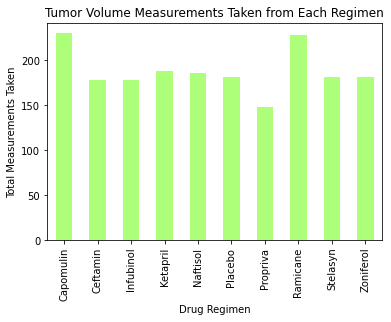

In [19]:
#creating a bar chart
drug_count_plot = drug_measurement_counts.plot(kind="bar", color="#ADFF79")

#labeling axes and setting a title
drug_count_plot.set_xlabel("Drug Regimen")
drug_count_plot.set_ylabel("Total Measurements Taken")
drug_count_plot.set_title("Tumor Volume Measurements Taken from Each Regimen")

plt.show()

Using Matplotlib:

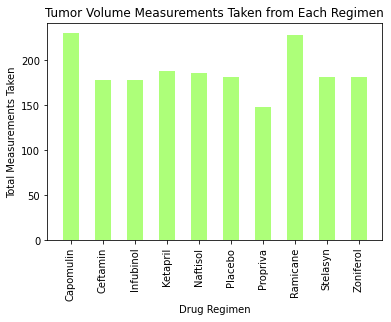

In [20]:
#creating a bar chart
plt.bar(drug_regimens, drug_measurement_counts, color="#ADFF79", align="center", width=0.5)

#labeling axes and setting title
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")
plt.title("Tumor Volume Measurements Taken from Each Regimen")

#rotate the labels so they can be read (jeeteshgavande30, 2021)
plt.xticks(rotation = 90)

plt.show()

Using Pandas:

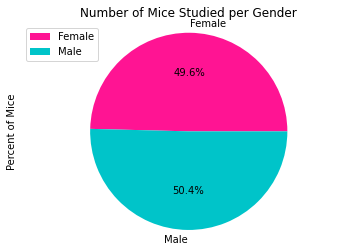

In [21]:
#creating a pie chart
gendered_mice_pie = gendered_mice_counts.plot(kind="pie", title="Number of Mice Studied per Gender", colors=("#ff1493", "#00c4c9"), autopct="%1.1f%%")

#labeling the y-axis and creating equal axes
gendered_mice_pie.set_ylabel("Percent of Mice")
gendered_mice_pie.axis("equal")

#adding a legend
gendered_mice_pie.legend(loc="upper left")

plt.show()

Using Matplotlib:

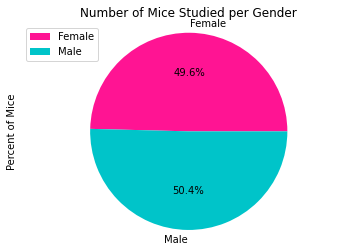

In [22]:
#creating a pie chart
plt.pie(gendered_mice_counts, labels=("Female", "Male"), colors=("#ff1493", "#00c4c9"), autopct="%1.1f%%")

#labeling the y-axis, adding a title, and creating equal axes
plt.ylabel("Percent of Mice")
plt.title("Number of Mice Studied per Gender")
plt.axis("equal")

#adding a laegend
plt.legend(loc="upper left")

plt.show()

# Quartiles, Outliers and Boxplots

In [213]:
#list of drug regimens we want to look at
promising_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#pulling Capomulin, Ramicane, Infubinol, and Ceftamin groups into their own dataframes and resetting the indicies
capomulin_data = drug_grouped_cleaned_mouse_data.get_group("Capomulin").reset_index()
ramicane_data = drug_grouped_cleaned_mouse_data.get_group("Ramicane").reset_index()
infubinol_data = drug_grouped_cleaned_mouse_data.get_group("Infubinol").reset_index()
ceftamin_data = drug_grouped_cleaned_mouse_data.get_group("Ceftamin").reset_index()

#grouping new data frames by mouse id
id_grouped_capomulin_data = capomulin_data.groupby("Mouse ID")
id_grouped_ramicane_data = ramicane_data.groupby("Mouse ID")
id_grouped_infubinol_data = infubinol_data.groupby("Mouse ID")
id_grouped_ceftamin_data = ceftamin_data.groupby("Mouse ID")

#finding the final tumor sizes for each mouse in each group
capomulin_tumor_final_data = id_grouped_capomulin_data["Tumor Volume (mm3)"].last()
ramicane_tumor_final_data = id_grouped_ramicane_data["Tumor Volume (mm3)"].last()
infubinol_tumor_final_data = id_grouped_infubinol_data["Tumor Volume (mm3)"].last()
ceftamin_tumor_final_data = id_grouped_ceftamin_data["Tumor Volume (mm3)"].last()

#list of the final tumor sizes
final_tumor_sizes = []

#appending the final sizes to the list
final_tumor_sizes.append(capomulin_tumor_final_data)
final_tumor_sizes.append(ramicane_tumor_final_data)
final_tumor_sizes.append(infubinol_tumor_final_data)
final_tumor_sizes.append(ceftamin_tumor_final_data)

#convert the final_data series to dataframes
capomulin_tumor_final_data = capomulin_tumor_final_data.to_frame()
ramicane_tumor_final_data = ramicane_tumor_final_data.to_frame()
infubinol_tumor_final_data = infubinol_tumor_final_data.to_frame()
ceftamin_tumor_final_data = ceftamin_tumor_final_data.to_frame()

#adding the drug regimen name to the data frame - used later in finding outliers to clarify which drug regimen they came from
capomulin_tumor_final_data["Drug Regimen"] = "Capomulin"
ramicane_tumor_final_data["Drug Regimen"] = "Ramicane"
infubinol_tumor_final_data["Drug Regimen"] = "Infubinol"
ceftamin_tumor_final_data["Drug Regimen"] = "Ceftamin"

final_tumor_sizes_df = pd.DataFrame({
    "Capomulin Mouse ID": final_tumor_sizes[0].index,
    "Capomulin Final Tumor Size (mm3)": final_tumor_sizes[0].values,
    "Ramicane Mouse ID": final_tumor_sizes[1].index,
    "Ramicane Final Tumor Size (mm3)": final_tumor_sizes[1].values,
    "Infubinol Mouse ID": final_tumor_sizes[2].index,
    "Infubinol Final Tumor Size (mm3)": final_tumor_sizes[2].values,
    "Ceftamin Mouse ID": final_tumor_sizes[3].index,
    "Ceftamin Final Tumor Size (mm3)": final_tumor_sizes[3].values,
})

final_tumor_sizes_df

,Capomulin Mouse ID,Capomulin Final Tumor Size (mm3),Ramicane Mouse ID,Ramicane Final Tumor Size (mm3),Infubinol Mouse ID,Infubinol Final Tumor Size (mm3),Ceftamin Mouse ID,Ceftamin Final Tumor Size (mm3)
0,b128,38.982878,a411,38.407618,a203,67.973419,a275,62.999356
1,b742,38.939633,a444,43.047543,a251,65.525743,b447,45.000000
2,f966,30.485985,a520,38.810366,a577,57.031862,b487,56.057749
3,g288,37.074024,a644,32.978522,a685,66.083066,b759,55.742829
4,g316,40.159220,c458,38.342008,c139,72.226731,f436,48.722078
5,i557,47.685963,c758,33.397653,c326,36.321346,h531,47.784682
6,i738,37.311846,d251,37.311236,c895,60.969711,j296,61.849023
7,j119,38.125164,e662,40.659006,e476,62.435404,k210,68.923185
8,j246,38.753265,g791,29.128472,f345,60.918767,l471,67.748662
9,l509,41.483008,i177,33.562402,i386,67.289621,l490,57.918381


In [214]:
#quartile list
drug_iqrs = []
#upper bounds list
upper_bounds = []
#lower bounds_list
lower_bounds = []
#list to hold outliers
outliers = []

#setting quartiles and finsing the upper and lower limits
def quartiles(df):
    #setting quartiles
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    #finding the lower and upper quartile respectively
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    #calculating iqr
    iqr = upperq-lowerq
    #appending iqr to list
    drug_iqrs.append(iqr)
    #calculating upper and lower bounds respectively
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    #pushing upper and lower bounds to their respective lists
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    #finding potential outliers
    for value in df["Tumor Volume (mm3)"]:
        if value > upper_bound:
            drug = df.loc[df["Tumor Volume (mm3)"] == value, "Drug Regimen"].values
            outliers.append(drug + ": " + str(value))
        elif value < lower_bound:
            drug = df.loc[df["Tumor Volume (mm3)"] == value, "Drug Regimen"].values
            outliers.append(drug + ": " + str(value))
            
#run the quartiles function on all 4 drug regimens
quartiles(capomulin_tumor_final_data)
quartiles(ramicane_tumor_final_data)
quartiles(infubinol_tumor_final_data)
quartiles(ceftamin_tumor_final_data)

#create a quartile dataframe for ease of reading data
promising_quartiles = pd.DataFrame({
    "Drug Regimen": promising_drug_regimens,
    "IQR": drug_iqrs,
    "Upper Bound": upper_bounds,
    "Lower Bound": lower_bounds
})
#resetting promising_quartiles index
promising_quartiles = promising_quartiles.set_index("Drug Regimen")

print(f"Potential Outliers: {outliers}\n")
promising_quartiles

Potential Outliers: [array(['Infubinol: 36.321345799999996'], dtype=object)]



,IQR,Upper Bound,Lower Bound
Drug Regimen,,,
Capomulin,7.781863,51.832015,20.704562
Ramicane,9.098537,54.306811,17.912664
Infubinol,11.477135,82.741446,36.832905
Ceftamin,15.577752,87.666458,25.355450


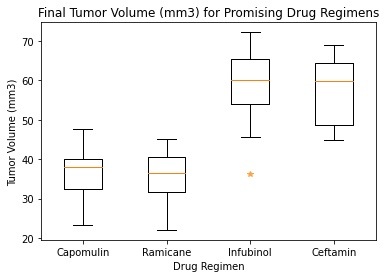

In [205]:
#setting outlier properties
flierprops = dict(marker="*", markeredgecolor="#ffa343", markerfacecolor = "#ffa343")
#plotting the tumor size data
plt.boxplot(final_tumor_sizes, flierprops=flierprops)
plt.title("Final Tumor Volume (mm3) for Promising Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], promising_drug_regimens)

plt.show()

# Line and Scatter Plots

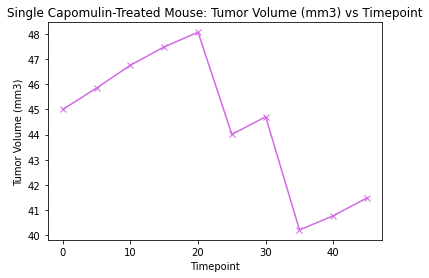

In [85]:
#get random Capomulin treated mouse
rnd_mouse = capomulin_data.sample()

#save the rnd_mouse MOuse ID to variable
rnd_mouse_ID = rnd_mouse["Mouse ID"]

#pulling all the data for that one mouse
rnd_mouse_data = capomulin_data.loc[(capomulin_data["Mouse ID"].values == rnd_mouse_ID.values), :]

#collecting values for line plot
#timepoint values for x-axis
timepoint = rnd_mouse_data["Timepoint"].values
#tumor volume values for y-axis
tumor_volume = rnd_mouse_data["Tumor Volume (mm3)"].values

#creating the line plot with matplotlib.pyplot
plt.plot(timepoint, tumor_volume, color="#d06ae3", marker="x")

#creating axes labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Single Capomulin-Treated Mouse: Tumor Volume (mm3) vs Timepoint")

plt.show()

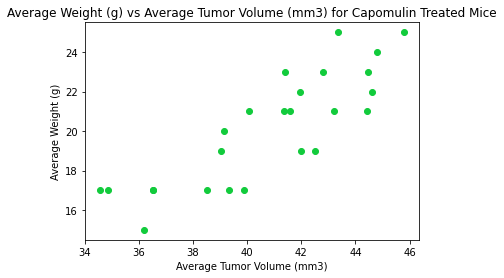

In [94]:
#getting average mouse weight for Capomulin treated mice
avg_mouse_weight = id_grouped_capomulin_data["Weight (g)"].mean()

#getting average tumor volume for Capomulin treated mice
avg_tumor_vol = id_grouped_capomulin_data["Tumor Volume (mm3)"].mean()

#creating scatter plot  with matplotlib.pyplot
plt.scatter(avg_tumor_vol, avg_mouse_weight, color="#12cb3c")

#setting axes labels and title
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")
plt.title("Average Weight (g) vs Average Tumor Volume (mm3) for Capomulin Treated Mice")

plt.show()

# Correlation and Regression

In [108]:
#finding linear regression values for the previous scatter plot
tumor_weight_slope, tumor_weight_intercept, tumor_weight_rvalue, tumor_weight_pvalue, tumor_weight_stddev = st.linregress(avg_tumor_vol, avg_mouse_weight)

#getting the correlation coefficient
tumor_weight_correlation_coef = tumor_weight_rvalue
tumor_weight_rsquared = tumor_weight_rvalue ** 2

#getting the regression values for the previous scatter plot
tumor_weight_regress = avg_tumor_vol * tumor_weight_slope + tumor_weight_intercept

#finding the line equation
tumor_weight_line_eq = f"y= {str(round(tumor_weight_slope, 2))}x + {str(round(tumor_weight_intercept, 2))}"


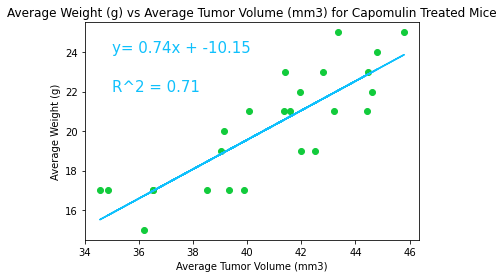

In [117]:
#the code to view the previous scatter plot
#creating scatter plot  with matplotlib.pyplot
plt.scatter(avg_tumor_vol, avg_mouse_weight, color="#12cb3c")

#setting axes labels and title
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")
plt.title("Average Weight (g) vs Average Tumor Volume (mm3) for Capomulin Treated Mice")
#end previous scatter plot code

#plotting the linear regression onto the previous scatter plot
plt.plot(avg_tumor_vol, tumor_weight_regress,  color="#0fc0fc")

#adding the equation to the plot
plt.annotate(tumor_weight_line_eq, (35,24), fontsize=15, color="#0fc0fc")

#adding the r-squared value to the plot
plt.annotate(f"R^2 = {round(tumor_weight_rsquared, 2)}", (35,22), fontsize=15, color="#0fc0fc")

plt.show()

# References

Used in class activites from Pandas (4.1-4.3) and MatPlotLib (5.1-5.3) as reference.

Additional references:

Chen, B. (2021, March 24). Finding and removing duplicate rows in pandas dataframe. Retrieved April 05, 2021, from https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

Drop or delete the row in python pandas with conditions. (2020, August 08). Retrieved April 05, 2021, from https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/

Jeeteshgavande30. (2021, January 24). How to ROTATE X-AXIS tick label text in MATPLOTLIB? Retrieved April 06, 2021, from https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/#:~:text=To%20rotate%20X-axis%20labels%2C%20there%20are%20various%20methods,built-in%20functions.%20Some%20methods%20are%20listed%20below%20%3A